In [2]:
import time
import json

import pandas as pd
import numpy as np
import scipy


import matplotlib.pyplot as plt

plt.style.use('seaborn')

## Data preparation

In [3]:
# Collect the data 
df_nationalconsumption_electricity_daily = pd.read_csv("data/rtu_data.csv")
df_nationalconsumption_electricity_daily.set_index(["day"], inplace = True)
df_nationalconsumption_electricity_daily = df_nationalconsumption_electricity_daily[df_nationalconsumption_electricity_daily["datastatus"] == "Définitif"]

In [54]:
df_nationalconsumption_electricity_daily.head()

,datastatus,dailyconsumption,weekday,week,month,year,avg_min_temperature,avg_max_temperature,avg_mean_temperature,wavg_min_temperature,wavg_max_temperature,wavg_mean_temperature,is_holiday
day,,,,,,,,,,,,,
2016-01-01,Définitif,2541358,4,53,1,2016,3.622308,10.899231,7.260000,3.166927,10.355107,6.760649,1
2016-01-02,Définitif,2691872,5,53,1,2016,6.862308,10.932308,8.898462,6.528056,10.556626,8.543535,0
2016-01-03,Définitif,2745015,6,53,1,2016,5.075385,9.722308,7.399231,4.616267,9.064628,6.840517,0
2016-01-04,Définitif,3141320,0,1,1,2016,5.839231,10.772308,8.306154,5.622484,10.215111,7.918589,0
2016-01-05,Définitif,3246600,1,1,1,2016,5.398462,9.999231,7.699231,4.944137,9.448007,7.196557,0


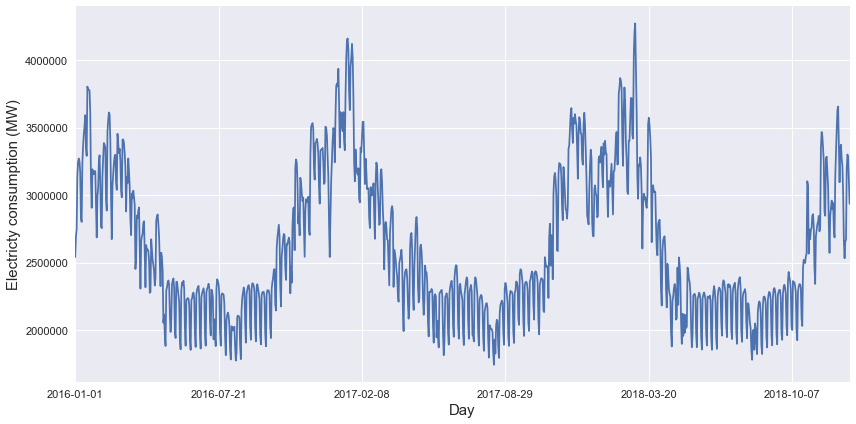

In [55]:
fig, ax = plt.subplots(figsize = (12,6))
ax = plt.subplot(1,1,1)
df_nationalconsumption_electricity_daily.plot(ax = ax , y = "dailyconsumption")
ax.legend().remove()

plt.xlabel("Day",size = 15)
plt.ylabel("Electricty consumption (MW)", size = 15)

plt.xticks(size = 11)
plt.yticks(size = 11)

fig.tight_layout()
plt.show()

In [57]:
# Zoom one specific week
year = 2017
week_range = [2,5]
df_nationalconsumption_electricity_daily_selected = df_nationalconsumption_electricity_daily[df_nationalconsumption_electricity_daily["week"].between(week_range[0],week_range[1])]
df_nationalconsumption_electricity_daily_selected = df_nationalconsumption_electricity_daily_selected[df_nationalconsumption_electricity_daily_selected["year"] == year]

df_nationalconsumption_electricity_daily_selected.head()


,datastatus,dailyconsumption,weekday,week,month,year,avg_min_temperature,avg_max_temperature,avg_mean_temperature,wavg_min_temperature,wavg_max_temperature,wavg_mean_temperature,is_holiday
day,,,,,,,,,,,,,
2017-01-09,Définitif,3615740,0,2,1,2017,2.065385,7.873846,4.969231,2.017565,7.283918,4.650737,0
2017-01-10,Définitif,3592428,1,2,1,2017,2.802308,7.858462,5.331538,2.562460,7.355693,4.960184,0
2017-01-11,Définitif,3507262,2,2,1,2017,3.328462,9.990000,6.659231,3.240398,9.882220,6.561169,0
2017-01-12,Définitif,3473567,3,2,1,2017,4.618462,10.604615,7.613077,4.693854,10.077749,7.386937,0
2017-01-13,Définitif,3615165,4,2,1,2017,1.944615,6.811538,4.379231,1.448901,6.009861,3.730302,0


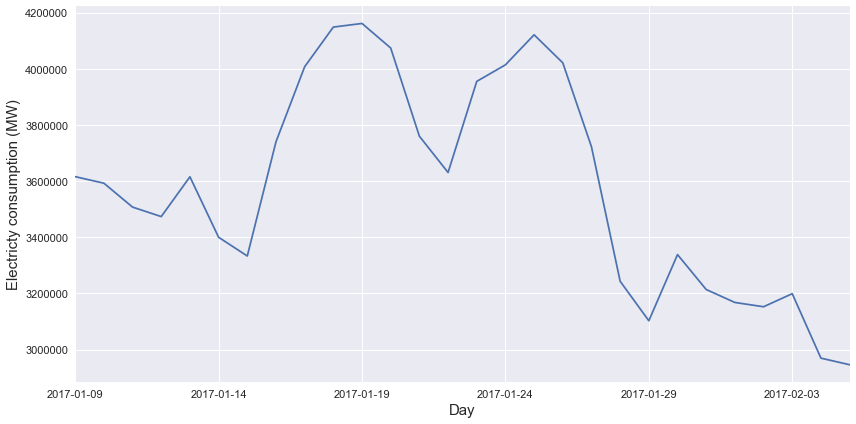

In [58]:
fig, ax = plt.subplots(figsize = (12,6))
ax = plt.subplot(1,1,1)
df_nationalconsumption_electricity_daily_selected.plot(ax = ax , y = "dailyconsumption")
ax.legend().remove()

plt.xlabel("Day",size = 15)
plt.ylabel("Electricty consumption (MW)", size = 15)

plt.xticks(size = 11)
plt.yticks(size = 11)

fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


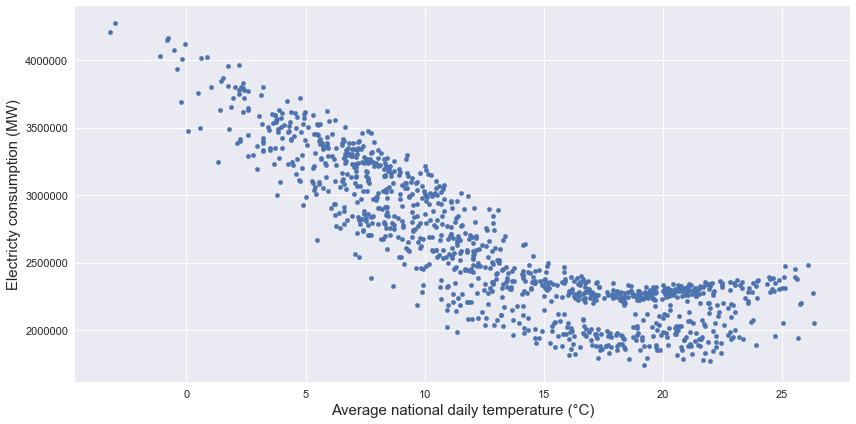

In [62]:
# Show the dependency to the temperature
fig, ax = plt.subplots(figsize = (12,6))
ax = plt.subplot(1,1,1)
df_nationalconsumption_electricity_daily.plot(ax = ax , x = "avg_mean_temperature" , y = "dailyconsumption", kind = "scatter")
ax.legend().remove()

plt.xlabel("Average national daily temperature (°C)",size = 15)
plt.ylabel("Electricty consumption (MW)", size = 15)

plt.xticks(size = 11)
plt.yticks(size = 11)

fig.tight_layout()
plt.show()

In [43]:
df_month_weekday = pd.pivot_table(df_nationalconsumption_electricity_daily, columns = "weekday", index = "month", values = "dailyconsumption", aggfunc = np.mean )
df_month_weekday.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_month_weekday.index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]